# EE4375-2022: Sixth Lab Session: Galerkin Finite Element Method for the Poisson Equation on the Unit Square 

 Solves the Poisson equation $- \bigtriangleup u = f$ on the unit square domain $\Omega=(0.,1.0)^2$ supplied with the homogeneous Dirichlet boundary condition $u = 0$ on $\Gamma$. The computational domain is kept simple on purpose for illustration purposes. The source function $f$ is defined as the sourcefct in what follows. Linear finite elements on triangular elements are used. The mesh is generated using the mesh generation software called gmsh (see [Gmsh](https://gmsh.info)). More information on the use of GMSH is provided at [extended-lab-sessions/gmsh](https://github.com/ziolai/finite_element_electrical_engineering/tree/main/extended-lab-sessions/gmsh).

## Import Packages

In [2]:
import Gmsh: gmsh 
using GR 
using LinearAlgebra
using SparseArrays 
using Plots
using LaTeXStrings

## Section 1: Geometry and Mesh Generation of Unit Square Geometry 
The code that follows performs <b>geometry generation</b> and <b>mesh generation</b> on the unit square geometry. 

First the <b>geometry</b> is generated in the following five steps:
1. four corner points of the square are defined. The points are labeled as 1 through 4;
2. four lines are defined as the edges of the square are defined by connecting previously defined points. Edges are formed by connecting points pairwise. The lines are given a start and end point. The lines are thus oriented. The edges are labeled as 1 through 4;  
3. the boundary of the square is defined by a loop connecting the four edges. The orientation of the edges given an orientation to the loop. The loop is oriented such that an imaginary observer walking on the loop finds the domain on his left-hand side. The loop is labeled as 1;  
4. the surface of the square is defined by the loop. It is on this square that the mesh generation will take place. This square is labeled as 1; 
5. a name is given to the surface; 

Next the <b>mesh</b> on the geometry is defined by mesh generation. The mesh is generated by first meshing the four edges of the square. The mesh is subsequently propagated towards the interior of the square. The mesh density is controlled by the parameter lc. 

The mesh is optionally written to file and visualized using the GUI. 

<b>Exercises </b>: 
1. change coordinate of one of the points and regenerate the mesh;
2. change the mesh density by changing the value of the parameter lc and regenerate the mesh. Apply different mesh density on one or more point or edges of the square; 
3. extend the code to the generation of a mesh on a pentagon; 
4. extend the code to the generation of a mesh on an L-shaped domain; 
5. extend the code to the generation of a mesh on a square with an inner square removed this practising the orientation of the loops; 
6. share imagines of the meshes obtained of social media of choice and notify your favorite finite element instructor; 

In [3]:
#..1/4: initialize gmsh 
gmsh.initialize()

#..2/4: generate geometry 
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("square")
#..set mesh density parameter 
lc = .2e-1
#..define four points via (x,y,z) coordinates 
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(1., 0,  0, lc, 2)
gmsh.model.geo.addPoint(1., 1., 0, lc, 3)
gmsh.model.geo.addPoint(0, 1., 0, lc, 4)
#..define four edges by connecting point labels pairwise  
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 1, 4)
#..define curved loop by connecting four edge labels  
gmsh.model.geo.addCurveLoop([1, 2, 3, 4], 1)
#..define surface by curved loop 
gmsh.model.geo.addPlaneSurface([1], 1)
#..give label to the surface 
#..syntax of the function being used is gmsh.model.setPhysicalName(dim, tag, name) 
gmsh.model.setPhysicalName(2, 1, "My surface")
#..synchronize model 
gmsh.model.geo.synchronize()

#..3/4: generate two-dimensional mesh 
gmsh.model.mesh.generate(2)
#..if true, write mesh to file for further processing 
if (true) gmsh.write("square.msh") end 
#..if true, visualize mesh through the GUI 
if (false) gmsh.fltk.run() end 

#..4/4: finalize gmsh 
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00117042s, CPU 0.000219s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0525324s, CPU 0.049817s)
Info    : 3014 nodes 6030 elements
Info    : Writing 'square.msh'...
Info    : Done writing 'square.msh'


## Section 2:/ Read Mesh from file and perform loop over the elements 
Exercise: 
- verify that sum of area of elements over mesh equals area of entire 2D domain;

In [4]:
#..1/4: Finalize gmsh
gmsh.initialize()

#..2/4: Read mesh from file
gmsh.open("square.msh")

#..3/4: perform loop over the elemements 
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])
  
for element_id in 1:nelements

    #....retrieve global numbering of the local nodes of the current element
    node1_id = element_connectivity[1][3*(element_id-1)+1]
    node2_id = element_connectivity[1][3*(element_id-1)+2]
    node3_id = element_connectivity[1][3*(element_id-1)+3]

    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println(" ")

end 

#..4/4: Finalize gmsh
gmsh.finalize()

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'
on element 1 node-1 has global number 2886
on element 1 node-2 has global number 1735
on element 1 node-3 has global number 2998
 
on element 2 node-1 has global number 1560
on element 2 node-2 has global number 1921
on element 2 node-3 has global number 1946
 
on element 3 node-1 has global number 1857
on element 3 node-2 has global number 235
on element 3 node-3 has global number 2024
 
on element 4 node-1 has global number 226
on element 4 node-2 has global number 2886
on element 4 node-3 has global number 2998
 
on element 5 node-1 has global number 2884
on element 5 node-2 has global number 2257
on element 5 node-3 has global number 2999
 
on element 6 node-1 has global number 2053
on element 6 node-2 has global number 1343
on element 6 node-3 has global number 2512
 
on element 7 node-1 has global number 2024
on element 7 node-2 has global number

on element 77 node-1 has global number 166
on element 77 node-2 has global number 167
on element 77 node-3 has global number 1764
 
on element 78 node-1 has global number 192
on element 78 node-2 has global number 193
on element 78 node-3 has global number 1765
 
on element 79 node-1 has global number 73
on element 79 node-2 has global number 74
on element 79 node-3 has global number 2143
 
on element 80 node-1 has global number 250
on element 80 node-2 has global number 1988
on element 80 node-3 has global number 1989
 
on element 81 node-1 has global number 1962
on element 81 node-2 has global number 251
on element 81 node-3 has global number 1964
 
on element 82 node-1 has global number 80
on element 82 node-2 has global number 81
on element 82 node-3 has global number 1767
 
on element 83 node-1 has global number 2894
on element 83 node-2 has global number 1318
on element 83 node-3 has global number 2903
 
on element 84 node-1 has global number 227
on element 84 node-2 has global n

on element 152 node-3 has global number 2964
 
on element 153 node-1 has global number 2858
on element 153 node-2 has global number 2107
on element 153 node-3 has global number 2980
 
on element 154 node-1 has global number 1995
on element 154 node-2 has global number 1193
on element 154 node-3 has global number 2885
 
on element 155 node-1 has global number 1994
on element 155 node-2 has global number 1993
on element 155 node-3 has global number 2881
 
on element 156 node-1 has global number 1990
on element 156 node-2 has global number 1989
on element 156 node-3 has global number 1991
 
on element 157 node-1 has global number 1762
on element 157 node-2 has global number 1763
on element 157 node-3 has global number 1768
 
on element 158 node-1 has global number 266
on element 158 node-2 has global number 1760
on element 158 node-3 has global number 2991
 
on element 159 node-1 has global number 2897
on element 159 node-2 has global number 1731
on element 159 node-3 has global number 28

on element 227 node-3 has global number 2732
 
on element 228 node-1 has global number 1614
on element 228 node-2 has global number 2034
on element 228 node-3 has global number 2801
 
on element 229 node-1 has global number 225
on element 229 node-2 has global number 1770
on element 229 node-3 has global number 2845
 
on element 230 node-1 has global number 686
on element 230 node-2 has global number 684
on element 230 node-3 has global number 2849
 
on element 231 node-1 has global number 727
on element 231 node-2 has global number 725
on element 231 node-3 has global number 2199
 
on element 232 node-1 has global number 688
on element 232 node-2 has global number 690
on element 232 node-3 has global number 1832
 
on element 233 node-1 has global number 2845
on element 233 node-2 has global number 1770
on element 233 node-3 has global number 2848
 
on element 234 node-1 has global number 225
on element 234 node-2 has global number 2820
on element 234 node-3 has global number 2834
 
on

on element 303 node-1 has global number 233
on element 303 node-2 has global number 1798
on element 303 node-3 has global number 2721
 
on element 304 node-1 has global number 691
on element 304 node-2 has global number 1780
on element 304 node-3 has global number 1882
 
on element 305 node-1 has global number 691
on element 305 node-2 has global number 688
on element 305 node-3 has global number 1832
 
on element 306 node-1 has global number 1780
on element 306 node-2 has global number 691
on element 306 node-3 has global number 1832
 
on element 307 node-1 has global number 1388
on element 307 node-2 has global number 1387
on element 307 node-3 has global number 1845
 
on element 308 node-1 has global number 1256
on element 308 node-2 has global number 2116
on element 308 node-3 has global number 2117
 
on element 309 node-1 has global number 707
on element 309 node-2 has global number 704
on element 309 node-3 has global number 1858
 
on element 310 node-1 has global number 703
on e

on element 425 node-3 has global number 2123
 
on element 426 node-1 has global number 430
on element 426 node-2 has global number 436
on element 426 node-3 has global number 1827
 
on element 427 node-1 has global number 1646
on element 427 node-2 has global number 1843
on element 427 node-3 has global number 2674
 
on element 428 node-1 has global number 1506
on element 428 node-2 has global number 1817
on element 428 node-3 has global number 1818
 
on element 429 node-1 has global number 2091
on element 429 node-2 has global number 960
on element 429 node-3 has global number 2347
 
on element 430 node-1 has global number 975
on element 430 node-2 has global number 1241
on element 430 node-3 has global number 2379
 
on element 431 node-1 has global number 1241
on element 431 node-2 has global number 2378
on element 431 node-3 has global number 2379
 
on element 432 node-1 has global number 1810
on element 432 node-2 has global number 2091
on element 432 node-3 has global number 2347


on element 500 node-3 has global number 1880
 
on element 501 node-1 has global number 591
on element 501 node-2 has global number 2121
on element 501 node-3 has global number 2760
 
on element 502 node-1 has global number 1183
on element 502 node-2 has global number 1684
on element 502 node-3 has global number 2087
 
on element 503 node-1 has global number 1364
on element 503 node-2 has global number 1183
on element 503 node-3 has global number 2087
 
on element 504 node-1 has global number 144
on element 504 node-2 has global number 2034
on element 504 node-3 has global number 2820
 
on element 505 node-1 has global number 2189
on element 505 node-2 has global number 1111
on element 505 node-3 has global number 2276
 
on element 506 node-1 has global number 1784
on element 506 node-2 has global number 1792
on element 506 node-3 has global number 2030
 
on element 507 node-1 has global number 1167
on element 507 node-2 has global number 323
on element 507 node-3 has global number 1897

on element 575 node-3 has global number 2169
 
on element 576 node-1 has global number 357
on element 576 node-2 has global number 1165
on element 576 node-3 has global number 2816
 
on element 577 node-1 has global number 2160
on element 577 node-2 has global number 1142
on element 577 node-3 has global number 2170
 
on element 578 node-1 has global number 1957
on element 578 node-2 has global number 1118
on element 578 node-3 has global number 2147
 
on element 579 node-1 has global number 2183
on element 579 node-2 has global number 2286
on element 579 node-3 has global number 2574
 
on element 580 node-1 has global number 734
on element 580 node-2 has global number 1064
on element 580 node-3 has global number 2234
 
on element 581 node-1 has global number 2556
on element 581 node-2 has global number 555
on element 581 node-3 has global number 2645
 
on element 582 node-1 has global number 1064
on element 582 node-2 has global number 732
on element 582 node-3 has global number 2165


on element 651 node-1 has global number 1247
on element 651 node-2 has global number 1240
on element 651 node-3 has global number 2809
 
on element 652 node-1 has global number 1924
on element 652 node-2 has global number 1001
on element 652 node-3 has global number 1933
 
on element 653 node-1 has global number 1239
on element 653 node-2 has global number 1111
on element 653 node-3 has global number 2189
 
on element 654 node-1 has global number 1861
on element 654 node-2 has global number 2041
on element 654 node-3 has global number 2744
 
on element 655 node-1 has global number 634
on element 655 node-2 has global number 651
on element 655 node-3 has global number 2602
 
on element 656 node-1 has global number 1397
on element 656 node-2 has global number 2236
on element 656 node-3 has global number 2805
 
on element 657 node-1 has global number 2380
on element 657 node-2 has global number 1241
on element 657 node-3 has global number 2724
 
on element 658 node-1 has global number 277

on element 726 node-2 has global number 2000
on element 726 node-3 has global number 2603
 
on element 727 node-1 has global number 238
on element 727 node-2 has global number 195
on element 727 node-3 has global number 1950
 
on element 728 node-1 has global number 1875
on element 728 node-2 has global number 1004
on element 728 node-3 has global number 2628
 
on element 729 node-1 has global number 1548
on element 729 node-2 has global number 2067
on element 729 node-3 has global number 2641
 
on element 730 node-1 has global number 202
on element 730 node-2 has global number 1855
on element 730 node-3 has global number 1856
 
on element 731 node-1 has global number 1466
on element 731 node-2 has global number 2036
on element 731 node-3 has global number 2517
 
on element 732 node-1 has global number 2194
on element 732 node-2 has global number 554
on element 732 node-3 has global number 2195
 
on element 733 node-1 has global number 2010
on element 733 node-2 has global number 1169


on element 814 node-2 has global number 2095
on element 814 node-3 has global number 2506
 
on element 815 node-1 has global number 1145
on element 815 node-2 has global number 1632
on element 815 node-3 has global number 2559
 
on element 816 node-1 has global number 1632
on element 816 node-2 has global number 2437
on element 816 node-3 has global number 2559
 
on element 817 node-1 has global number 1169
on element 817 node-2 has global number 2010
on element 817 node-3 has global number 2603
 
on element 818 node-1 has global number 108
on element 818 node-2 has global number 109
on element 818 node-3 has global number 230
 
on element 819 node-1 has global number 555
on element 819 node-2 has global number 456
on element 819 node-3 has global number 2575
 
on element 820 node-1 has global number 1906
on element 820 node-2 has global number 1907
on element 820 node-3 has global number 1908
 
on element 821 node-1 has global number 808
on element 821 node-2 has global number 444
on 

on element 889 node-3 has global number 2440
 
on element 890 node-1 has global number 1968
on element 890 node-2 has global number 494
on element 890 node-3 has global number 1969
 
on element 891 node-1 has global number 1510
on element 891 node-2 has global number 2746
on element 891 node-3 has global number 2748
 
on element 892 node-1 has global number 1563
on element 892 node-2 has global number 1561
on element 892 node-3 has global number 1564
 
on element 893 node-1 has global number 2117
on element 893 node-2 has global number 2118
on element 893 node-3 has global number 2119
 
on element 894 node-1 has global number 2770
on element 894 node-2 has global number 1836
on element 894 node-3 has global number 2773
 
on element 895 node-1 has global number 1118
on element 895 node-2 has global number 1957
on element 895 node-3 has global number 2690
 
on element 896 node-1 has global number 2718
on element 896 node-2 has global number 1448
on element 896 node-3 has global number 27

on element 965 node-1 has global number 136
on element 965 node-2 has global number 137
on element 965 node-3 has global number 1977
 
on element 966 node-1 has global number 1645
on element 966 node-2 has global number 2058
on element 966 node-3 has global number 2226
 
on element 967 node-1 has global number 1960
on element 967 node-2 has global number 1961
on element 967 node-3 has global number 1962
 
on element 968 node-1 has global number 743
on element 968 node-2 has global number 1967
on element 968 node-3 has global number 2405
 
on element 969 node-1 has global number 2029
on element 969 node-2 has global number 969
on element 969 node-3 has global number 2359
 
on element 970 node-1 has global number 199
on element 970 node-2 has global number 200
on element 970 node-3 has global number 273
 
on element 971 node-1 has global number 1804
on element 971 node-2 has global number 1805
on element 971 node-3 has global number 2004
 
on element 972 node-1 has global number 229
on e

on element 1039 node-2 has global number 2349
on element 1039 node-3 has global number 2665
 
on element 1040 node-1 has global number 1110
on element 1040 node-2 has global number 1338
on element 1040 node-3 has global number 1339
 
on element 1041 node-1 has global number 2021
on element 1041 node-2 has global number 2272
on element 1041 node-3 has global number 2688
 
on element 1042 node-1 has global number 1516
on element 1042 node-2 has global number 2007
on element 1042 node-3 has global number 2174
 
on element 1043 node-1 has global number 1378
on element 1043 node-2 has global number 613
on element 1043 node-3 has global number 2181
 
on element 1044 node-1 has global number 1230
on element 1044 node-2 has global number 1122
on element 1044 node-3 has global number 1300
 
on element 1045 node-1 has global number 1079
on element 1045 node-2 has global number 2033
on element 1045 node-3 has global number 2661
 
on element 1046 node-1 has global number 651
on element 1046 node-2

on element 1113 node-1 has global number 2183
on element 1113 node-2 has global number 2184
on element 1113 node-3 has global number 2286
 
on element 1114 node-1 has global number 551
on element 1114 node-2 has global number 570
on element 1114 node-3 has global number 1999
 
on element 1115 node-1 has global number 2103
on element 1115 node-2 has global number 2104
on element 1115 node-3 has global number 2208
 
on element 1116 node-1 has global number 624
on element 1116 node-2 has global number 623
on element 1116 node-3 has global number 635
 
on element 1117 node-1 has global number 135
on element 1117 node-2 has global number 253
on element 1117 node-3 has global number 1974
 
on element 1118 node-1 has global number 1492
on element 1118 node-2 has global number 278
on element 1118 node-3 has global number 2593
 
on element 1119 node-1 has global number 1633
on element 1119 node-2 has global number 1595
on element 1119 node-3 has global number 1634
 
on element 1120 node-1 has g

on element 1199 node-2 has global number 1379
on element 1199 node-3 has global number 2043
 
on element 1200 node-1 has global number 1642
on element 1200 node-2 has global number 2309
on element 1200 node-3 has global number 2310
 
on element 1201 node-1 has global number 2073
on element 1201 node-2 has global number 655
on element 1201 node-3 has global number 2289
 
on element 1202 node-1 has global number 804
on element 1202 node-2 has global number 778
on element 1202 node-3 has global number 1039
 
on element 1203 node-1 has global number 754
on element 1203 node-2 has global number 756
on element 1203 node-3 has global number 2184
 
on element 1204 node-1 has global number 1550
on element 1204 node-2 has global number 1552
on element 1204 node-3 has global number 1646
 
on element 1205 node-1 has global number 1988
on element 1205 node-2 has global number 1987
on element 1205 node-3 has global number 1989
 
on element 1206 node-1 has global number 1997
on element 1206 node-2 ha

on element 1273 node-1 has global number 647
on element 1273 node-2 has global number 2436
on element 1273 node-3 has global number 2475
 
on element 1274 node-1 has global number 655
on element 1274 node-2 has global number 2097
on element 1274 node-3 has global number 2348
 
on element 1275 node-1 has global number 665
on element 1275 node-2 has global number 1258
on element 1275 node-3 has global number 2043
 
on element 1276 node-1 has global number 218
on element 1276 node-2 has global number 90
on element 1276 node-3 has global number 2032
 
on element 1277 node-1 has global number 662
on element 1277 node-2 has global number 663
on element 1277 node-3 has global number 664
 
on element 1278 node-1 has global number 1794
on element 1278 node-2 has global number 1793
on element 1278 node-3 has global number 1795
 
on element 1279 node-1 has global number 1120
on element 1279 node-2 has global number 1304
on element 1279 node-3 has global number 2147
 
on element 1280 node-1 has gl

on element 1347 node-1 has global number 1718
on element 1347 node-2 has global number 1596
on element 1347 node-3 has global number 2076
 
on element 1348 node-1 has global number 134
on element 1348 node-2 has global number 135
on element 1348 node-3 has global number 1974
 
on element 1349 node-1 has global number 1714
on element 1349 node-2 has global number 1416
on element 1349 node-3 has global number 1715
 
on element 1350 node-1 has global number 800
on element 1350 node-2 has global number 801
on element 1350 node-3 has global number 1006
 
on element 1351 node-1 has global number 821
on element 1351 node-2 has global number 819
on element 1351 node-3 has global number 1176
 
on element 1352 node-1 has global number 1380
on element 1352 node-2 has global number 1382
on element 1352 node-3 has global number 1576
 
on element 1353 node-1 has global number 2245
on element 1353 node-2 has global number 1869
on element 1353 node-3 has global number 2730
 
on element 1354 node-1 has

on element 1421 node-1 has global number 953
on element 1421 node-2 has global number 954
on element 1421 node-3 has global number 955
 
on element 1422 node-1 has global number 2248
on element 1422 node-2 has global number 1952
on element 1422 node-3 has global number 2388
 
on element 1423 node-1 has global number 653
on element 1423 node-2 has global number 617
on element 1423 node-3 has global number 1186
 
on element 1424 node-1 has global number 787
on element 1424 node-2 has global number 786
on element 1424 node-3 has global number 2098
 
on element 1425 node-1 has global number 370
on element 1425 node-2 has global number 371
on element 1425 node-3 has global number 376
 
on element 1426 node-1 has global number 1448
on element 1426 node-2 has global number 769
on element 1426 node-3 has global number 2552
 
on element 1427 node-1 has global number 1087
on element 1427 node-2 has global number 1086
on element 1427 node-3 has global number 1312
 
on element 1428 node-1 has glob

on element 1494 node-3 has global number 2031
 
on element 1495 node-1 has global number 2227
on element 1495 node-2 has global number 2204
on element 1495 node-3 has global number 2374
 
on element 1496 node-1 has global number 1088
on element 1496 node-2 has global number 1307
on element 1496 node-3 has global number 2315
 
on element 1497 node-1 has global number 744
on element 1497 node-2 has global number 974
on element 1497 node-3 has global number 2274
 
on element 1498 node-1 has global number 344
on element 1498 node-2 has global number 342
on element 1498 node-3 has global number 1148
 
on element 1499 node-1 has global number 1794
on element 1499 node-2 has global number 1795
on element 1499 node-3 has global number 1796
 
on element 1500 node-1 has global number 183
on element 1500 node-2 has global number 184
on element 1500 node-3 has global number 2006
 
on element 1501 node-1 has global number 1316
on element 1501 node-2 has global number 1313
on element 1501 node-3 has

on element 1588 node-2 has global number 1367
on element 1588 node-3 has global number 1927
 
on element 1589 node-1 has global number 2537
on element 1589 node-2 has global number 2295
on element 1589 node-3 has global number 2576
 
on element 1590 node-1 has global number 951
on element 1590 node-2 has global number 950
on element 1590 node-3 has global number 952
 
on element 1591 node-1 has global number 1040
on element 1591 node-2 has global number 1106
on element 1591 node-3 has global number 1260
 
on element 1592 node-1 has global number 1474
on element 1592 node-2 has global number 1045
on element 1592 node-3 has global number 2381
 
on element 1593 node-1 has global number 2014
on element 1593 node-2 has global number 2011
on element 1593 node-3 has global number 2231
 
on element 1594 node-1 has global number 196
on element 1594 node-2 has global number 197
on element 1594 node-3 has global number 1948
 
on element 1595 node-1 has global number 828
on element 1595 node-2 has

on element 1662 node-2 has global number 987
on element 1662 node-3 has global number 1120
 
on element 1663 node-1 has global number 190
on element 1663 node-2 has global number 191
on element 1663 node-3 has global number 2052
 
on element 1664 node-1 has global number 1675
on element 1664 node-2 has global number 936
on element 1664 node-3 has global number 2470
 
on element 1665 node-1 has global number 638
on element 1665 node-2 has global number 637
on element 1665 node-3 has global number 2229
 
on element 1666 node-1 has global number 796
on element 1666 node-2 has global number 1077
on element 1666 node-3 has global number 2074
 
on element 1667 node-1 has global number 1393
on element 1667 node-2 has global number 1395
on element 1667 node-3 has global number 2228
 
on element 1668 node-1 has global number 509
on element 1668 node-2 has global number 510
on element 1668 node-3 has global number 2224
 
on element 1669 node-1 has global number 105
on element 1669 node-2 has glo

on element 1736 node-2 has global number 1936
on element 1736 node-3 has global number 2359
 
on element 1737 node-1 has global number 1398
on element 1737 node-2 has global number 1400
on element 1737 node-3 has global number 2217
 
on element 1738 node-1 has global number 543
on element 1738 node-2 has global number 544
on element 1738 node-3 has global number 548
 
on element 1739 node-1 has global number 2249
on element 1739 node-2 has global number 1920
on element 1739 node-3 has global number 2250
 
on element 1740 node-1 has global number 625
on element 1740 node-2 has global number 626
on element 1740 node-3 has global number 2220
 
on element 1741 node-1 has global number 1157
on element 1741 node-2 has global number 1220
on element 1741 node-3 has global number 2255
 
on element 1742 node-1 has global number 397
on element 1742 node-2 has global number 398
on element 1742 node-3 has global number 399
 
on element 1743 node-1 has global number 533
on element 1743 node-2 has gl

on element 1810 node-2 has global number 754
on element 1810 node-3 has global number 2182
 
on element 1811 node-1 has global number 403
on element 1811 node-2 has global number 404
on element 1811 node-3 has global number 405
 
on element 1812 node-1 has global number 756
on element 1812 node-2 has global number 758
on element 1812 node-3 has global number 805
 
on element 1813 node-1 has global number 841
on element 1813 node-2 has global number 842
on element 1813 node-3 has global number 847
 
on element 1814 node-1 has global number 388
on element 1814 node-2 has global number 387
on element 1814 node-3 has global number 389
 
on element 1815 node-1 has global number 771
on element 1815 node-2 has global number 769
on element 1815 node-3 has global number 1448
 
on element 1816 node-1 has global number 825
on element 1816 node-2 has global number 824
on element 1816 node-3 has global number 1041
 
on element 1817 node-1 has global number 1957
on element 1817 node-2 has global num

on element 1884 node-2 has global number 1389
on element 1884 node-3 has global number 1516
 
on element 1885 node-1 has global number 1647
on element 1885 node-2 has global number 2308
on element 1885 node-3 has global number 2330
 
on element 1886 node-1 has global number 1329
on element 1886 node-2 has global number 1717
on element 1886 node-3 has global number 2283
 
on element 1887 node-1 has global number 443
on element 1887 node-2 has global number 444
on element 1887 node-3 has global number 445
 
on element 1888 node-1 has global number 97
on element 1888 node-2 has global number 98
on element 1888 node-3 has global number 2051
 
on element 1889 node-1 has global number 487
on element 1889 node-2 has global number 488
on element 1889 node-3 has global number 489
 
on element 1890 node-1 has global number 402
on element 1890 node-2 has global number 813
on element 1890 node-3 has global number 1638
 
on element 1891 node-1 has global number 899
on element 1891 node-2 has global

on element 1975 node-3 has global number 2222
 
on element 1976 node-1 has global number 669
on element 1976 node-2 has global number 670
on element 1976 node-3 has global number 671
 
on element 1977 node-1 has global number 1363
on element 1977 node-2 has global number 1885
on element 1977 node-3 has global number 2259
 
on element 1978 node-1 has global number 246
on element 1978 node-2 has global number 2078
on element 1978 node-3 has global number 2079
 
on element 1979 node-1 has global number 2262
on element 1979 node-2 has global number 858
on element 1979 node-3 has global number 2288
 
on element 1980 node-1 has global number 478
on element 1980 node-2 has global number 477
on element 1980 node-3 has global number 479
 
on element 1981 node-1 has global number 1366
on element 1981 node-2 has global number 1148
on element 1981 node-3 has global number 1642
 
on element 1982 node-1 has global number 1976
on element 1982 node-2 has global number 1977
on element 1982 node-3 has g

on element 2049 node-2 has global number 2103
on element 2049 node-3 has global number 2299
 
on element 2050 node-1 has global number 2238
on element 2050 node-2 has global number 505
on element 2050 node-3 has global number 2239
 
on element 2051 node-1 has global number 665
on element 2051 node-2 has global number 663
on element 2051 node-3 has global number 1257
 
on element 2052 node-1 has global number 1393
on element 2052 node-2 has global number 1283
on element 2052 node-3 has global number 1394
 
on element 2053 node-1 has global number 1867
on element 2053 node-2 has global number 1866
on element 2053 node-3 has global number 1868
 
on element 2054 node-1 has global number 1111
on element 2054 node-2 has global number 907
on element 2054 node-3 has global number 2276
 
on element 2055 node-1 has global number 409
on element 2055 node-2 has global number 412
on element 2055 node-3 has global number 2222
 
on element 2056 node-1 has global number 515
on element 2056 node-2 has 

on element 2123 node-2 has global number 2112
on element 2123 node-3 has global number 2531
 
on element 2124 node-1 has global number 2193
on element 2124 node-2 has global number 2194
on element 2124 node-3 has global number 2195
 
on element 2125 node-1 has global number 648
on element 2125 node-2 has global number 922
on element 2125 node-3 has global number 994
 
on element 2126 node-1 has global number 758
on element 2126 node-2 has global number 759
on element 2126 node-3 has global number 2190
 
on element 2127 node-1 has global number 846
on element 2127 node-2 has global number 895
on element 2127 node-3 has global number 896
 
on element 2128 node-1 has global number 364
on element 2128 node-2 has global number 363
on element 2128 node-3 has global number 366
 
on element 2129 node-1 has global number 832
on element 2129 node-2 has global number 1146
on element 2129 node-3 has global number 2140
 
on element 2130 node-1 has global number 1078
on element 2130 node-2 has globa

on element 2197 node-1 has global number 490
on element 2197 node-2 has global number 494
on element 2197 node-3 has global number 2307
 
on element 2198 node-1 has global number 505
on element 2198 node-2 has global number 493
on element 2198 node-3 has global number 2296
 
on element 2199 node-1 has global number 573
on element 2199 node-2 has global number 2532
on element 2199 node-3 has global number 2615
 
on element 2200 node-1 has global number 1267
on element 2200 node-2 has global number 1164
on element 2200 node-3 has global number 2227
 
on element 2201 node-1 has global number 1411
on element 2201 node-2 has global number 1412
on element 2201 node-3 has global number 1413
 
on element 2202 node-1 has global number 756
on element 2202 node-2 has global number 755
on element 2202 node-3 has global number 757
 
on element 2203 node-1 has global number 566
on element 2203 node-2 has global number 565
on element 2203 node-3 has global number 574
 
on element 2204 node-1 has glob

on element 2271 node-1 has global number 1645
on element 2271 node-2 has global number 1644
on element 2271 node-3 has global number 2056
 
on element 2272 node-1 has global number 861
on element 2272 node-2 has global number 859
on element 2272 node-3 has global number 2340
 
on element 2273 node-1 has global number 2329
on element 2273 node-2 has global number 1245
on element 2273 node-3 has global number 2355
 
on element 2274 node-1 has global number 528
on element 2274 node-2 has global number 529
on element 2274 node-3 has global number 530
 
on element 2275 node-1 has global number 845
on element 2275 node-2 has global number 843
on element 2275 node-3 has global number 898
 
on element 2276 node-1 has global number 1320
on element 2276 node-2 has global number 1321
on element 2276 node-3 has global number 1716
 
on element 2277 node-1 has global number 770
on element 2277 node-2 has global number 776
on element 2277 node-3 has global number 2468
 
on element 2278 node-1 has glo

on element 2355 node-3 has global number 942
 
on element 2356 node-1 has global number 1898
on element 2356 node-2 has global number 1370
on element 2356 node-3 has global number 1899
 
on element 2357 node-1 has global number 71
on element 2357 node-2 has global number 72
on element 2357 node-3 has global number 2346
 
on element 2358 node-1 has global number 449
on element 2358 node-2 has global number 450
on element 2358 node-3 has global number 451
 
on element 2359 node-1 has global number 1034
on element 2359 node-2 has global number 1035
on element 2359 node-3 has global number 1036
 
on element 2360 node-1 has global number 679
on element 2360 node-2 has global number 678
on element 2360 node-3 has global number 2168
 
on element 2361 node-1 has global number 1400
on element 2361 node-2 has global number 1399
on element 2361 node-3 has global number 1401
 
on element 2362 node-1 has global number 496
on element 2362 node-2 has global number 495
on element 2362 node-3 has globa

on element 2429 node-3 has global number 1439
 
on element 2430 node-1 has global number 1055
on element 2430 node-2 has global number 1180
on element 2430 node-3 has global number 1181
 
on element 2431 node-1 has global number 855
on element 2431 node-2 has global number 1044
on element 2431 node-3 has global number 2218
 
on element 2432 node-1 has global number 2220
on element 2432 node-2 has global number 1411
on element 2432 node-3 has global number 2289
 
on element 2433 node-1 has global number 492
on element 2433 node-2 has global number 490
on element 2433 node-3 has global number 2307
 
on element 2434 node-1 has global number 844
on element 2434 node-2 has global number 846
on element 2434 node-3 has global number 2215
 
on element 2435 node-1 has global number 351
on element 2435 node-2 has global number 1532
on element 2435 node-3 has global number 2318
 
on element 2436 node-1 has global number 1392
on element 2436 node-2 has global number 1605
on element 2436 node-3 has

on element 2503 node-3 has global number 707
 
on element 2504 node-1 has global number 1218
on element 2504 node-2 has global number 1601
on element 2504 node-3 has global number 1640
 
on element 2505 node-1 has global number 1294
on element 2505 node-2 has global number 1507
on element 2505 node-3 has global number 2327
 
on element 2506 node-1 has global number 451
on element 2506 node-2 has global number 452
on element 2506 node-3 has global number 453
 
on element 2507 node-1 has global number 1149
on element 2507 node-2 has global number 2216
on element 2507 node-3 has global number 2384
 
on element 2508 node-1 has global number 496
on element 2508 node-2 has global number 498
on element 2508 node-3 has global number 918
 
on element 2509 node-1 has global number 1439
on element 2509 node-2 has global number 923
on element 2509 node-3 has global number 2432
 
on element 2510 node-1 has global number 1805
on element 2510 node-2 has global number 1807
on element 2510 node-3 has g

on element 2577 node-3 has global number 1352
 
on element 2578 node-1 has global number 2157
on element 2578 node-2 has global number 1334
on element 2578 node-3 has global number 2345
 
on element 2579 node-1 has global number 2061
on element 2579 node-2 has global number 2063
on element 2579 node-3 has global number 2064
 
on element 2580 node-1 has global number 1452
on element 2580 node-2 has global number 1168
on element 2580 node-3 has global number 2240
 
on element 2581 node-1 has global number 2250
on element 2581 node-2 has global number 2251
on element 2581 node-3 has global number 2252
 
on element 2582 node-1 has global number 822
on element 2582 node-2 has global number 2190
on element 2582 node-3 has global number 2371
 
on element 2583 node-1 has global number 2156
on element 2583 node-2 has global number 2157
on element 2583 node-3 has global number 2158
 
on element 2584 node-1 has global number 918
on element 2584 node-2 has global number 498
on element 2584 node-3 

on element 2651 node-2 has global number 301
on element 2651 node-3 has global number 910
 
on element 2652 node-1 has global number 1058
on element 2652 node-2 has global number 1132
on element 2652 node-3 has global number 1232
 
on element 2653 node-1 has global number 341
on element 2653 node-2 has global number 338
on element 2653 node-3 has global number 342
 
on element 2654 node-1 has global number 742
on element 2654 node-2 has global number 745
on element 2654 node-3 has global number 746
 
on element 2655 node-1 has global number 1221
on element 2655 node-2 has global number 1278
on element 2655 node-3 has global number 2253
 
on element 2656 node-1 has global number 396
on element 2656 node-2 has global number 752
on element 2656 node-3 has global number 818
 
on element 2657 node-1 has global number 2426
on element 2657 node-2 has global number 1139
on element 2657 node-3 has global number 2485
 
on element 2658 node-1 has global number 1386
on element 2658 node-2 has glob

on element 2745 node-3 has global number 726
 
on element 2746 node-1 has global number 1815
on element 2746 node-2 has global number 1423
on element 2746 node-3 has global number 1817
 
on element 2747 node-1 has global number 1536
on element 2747 node-2 has global number 1535
on element 2747 node-3 has global number 1883
 
on element 2748 node-1 has global number 325
on element 2748 node-2 has global number 327
on element 2748 node-3 has global number 827
 
on element 2749 node-1 has global number 1622
on element 2749 node-2 has global number 1623
on element 2749 node-3 has global number 1804
 
on element 2750 node-1 has global number 993
on element 2750 node-2 has global number 1187
on element 2750 node-3 has global number 1425
 
on element 2751 node-1 has global number 1512
on element 2751 node-2 has global number 605
on element 2751 node-3 has global number 2604
 
on element 2752 node-1 has global number 436
on element 2752 node-2 has global number 435
on element 2752 node-3 has g

on element 2819 node-3 has global number 2485
 
on element 2820 node-1 has global number 322
on element 2820 node-2 has global number 324
on element 2820 node-3 has global number 325
 
on element 2821 node-1 has global number 639
on element 2821 node-2 has global number 638
on element 2821 node-3 has global number 640
 
on element 2822 node-1 has global number 1416
on element 2822 node-2 has global number 2095
on element 2822 node-3 has global number 2349
 
on element 2823 node-1 has global number 1248
on element 2823 node-2 has global number 1247
on element 2823 node-3 has global number 1249
 
on element 2824 node-1 has global number 1463
on element 2824 node-2 has global number 1451
on element 2824 node-3 has global number 1464
 
on element 2825 node-1 has global number 2101
on element 2825 node-2 has global number 810
on element 2825 node-3 has global number 2452
 
on element 2826 node-1 has global number 896
on element 2826 node-2 has global number 895
on element 2826 node-3 has gl

on element 2893 node-3 has global number 1177
 
on element 2894 node-1 has global number 509
on element 2894 node-2 has global number 508
on element 2894 node-3 has global number 510
 
on element 2895 node-1 has global number 990
on element 2895 node-2 has global number 989
on element 2895 node-3 has global number 991
 
on element 2896 node-1 has global number 1337
on element 2896 node-2 has global number 1106
on element 2896 node-3 has global number 2148
 
on element 2897 node-1 has global number 1434
on element 2897 node-2 has global number 1369
on element 2897 node-3 has global number 1443
 
on element 2898 node-1 has global number 983
on element 2898 node-2 has global number 577
on element 2898 node-3 has global number 984
 
on element 2899 node-1 has global number 288
on element 2899 node-2 has global number 290
on element 2899 node-3 has global number 2311
 
on element 2900 node-1 has global number 365
on element 2900 node-2 has global number 368
on element 2900 node-3 has global

on element 2967 node-2 has global number 862
on element 2967 node-3 has global number 865
 
on element 2968 node-1 has global number 1785
on element 2968 node-2 has global number 1618
on element 2968 node-3 has global number 1786
 
on element 2969 node-1 has global number 640
on element 2969 node-2 has global number 642
on element 2969 node-3 has global number 2364
 
on element 2970 node-1 has global number 2201
on element 2970 node-2 has global number 1405
on element 2970 node-3 has global number 2202
 
on element 2971 node-1 has global number 1463
on element 2971 node-2 has global number 1464
on element 2971 node-3 has global number 1624
 
on element 2972 node-1 has global number 694
on element 2972 node-2 has global number 692
on element 2972 node-3 has global number 695
 
on element 2973 node-1 has global number 1027
on element 2973 node-2 has global number 2293
on element 2973 node-3 has global number 2344
 
on element 2974 node-1 has global number 1185
on element 2974 node-2 has 

on element 3041 node-2 has global number 339
on element 3041 node-3 has global number 2334
 
on element 3042 node-1 has global number 345
on element 3042 node-2 has global number 346
on element 3042 node-3 has global number 347
 
on element 3043 node-1 has global number 1370
on element 3043 node-2 has global number 1140
on element 3043 node-3 has global number 2392
 
on element 3044 node-1 has global number 334
on element 3044 node-2 has global number 331
on element 3044 node-3 has global number 567
 
on element 3045 node-1 has global number 694
on element 3045 node-2 has global number 695
on element 3045 node-3 has global number 696
 
on element 3046 node-1 has global number 1264
on element 3046 node-2 has global number 1519
on element 3046 node-3 has global number 2400
 
on element 3047 node-1 has global number 316
on element 3047 node-2 has global number 319
on element 3047 node-3 has global number 2376
 
on element 3048 node-1 has global number 735
on element 3048 node-2 has global

on element 3128 node-3 has global number 1622
 
on element 3129 node-1 has global number 829
on element 3129 node-2 has global number 830
on element 3129 node-3 has global number 831
 
on element 3130 node-1 has global number 898
on element 3130 node-2 has global number 2383
on element 3130 node-3 has global number 2542
 
on element 3131 node-1 has global number 1446
on element 3131 node-2 has global number 1447
on element 3131 node-3 has global number 1837
 
on element 3132 node-1 has global number 974
on element 3132 node-2 has global number 747
on element 3132 node-3 has global number 1069
 
on element 3133 node-1 has global number 804
on element 3133 node-2 has global number 1040
on element 3133 node-3 has global number 2498
 
on element 3134 node-1 has global number 689
on element 3134 node-2 has global number 692
on element 3134 node-3 has global number 693
 
on element 3135 node-1 has global number 1161
on element 3135 node-2 has global number 1162
on element 3135 node-3 has glo

on element 3202 node-3 has global number 2012
 
on element 3203 node-1 has global number 701
on element 3203 node-2 has global number 700
on element 3203 node-3 has global number 702
 
on element 3204 node-1 has global number 307
on element 3204 node-2 has global number 306
on element 3204 node-3 has global number 308
 
on element 3205 node-1 has global number 1264
on element 3205 node-2 has global number 1263
on element 3205 node-3 has global number 1517
 
on element 3206 node-1 has global number 1523
on element 3206 node-2 has global number 1511
on element 3206 node-3 has global number 1711
 
on element 3207 node-1 has global number 457
on element 3207 node-2 has global number 456
on element 3207 node-3 has global number 458
 
on element 3208 node-1 has global number 1657
on element 3208 node-2 has global number 1377
on element 3208 node-3 has global number 1658
 
on element 3209 node-1 has global number 1504
on element 3209 node-2 has global number 1505
on element 3209 node-3 has gl

on element 3276 node-2 has global number 1276
on element 3276 node-3 has global number 1277
 
on element 3277 node-1 has global number 328
on element 3277 node-2 has global number 332
on element 3277 node-3 has global number 2351
 
on element 3278 node-1 has global number 417
on element 3278 node-2 has global number 419
on element 3278 node-3 has global number 420
 
on element 3279 node-1 has global number 538
on element 3279 node-2 has global number 537
on element 3279 node-3 has global number 539
 
on element 3280 node-1 has global number 950
on element 3280 node-2 has global number 1173
on element 3280 node-3 has global number 2347
 
on element 3281 node-1 has global number 1338
on element 3281 node-2 has global number 1340
on element 3281 node-3 has global number 2009
 
on element 3282 node-1 has global number 2013
on element 3282 node-2 has global number 2015
on element 3282 node-3 has global number 2016
 
on element 3283 node-1 has global number 717
on element 3283 node-2 has glo

on element 3350 node-2 has global number 1337
on element 3350 node-3 has global number 2148
 
on element 3351 node-1 has global number 1182
on element 3351 node-2 has global number 1665
on element 3351 node-3 has global number 1666
 
on element 3352 node-1 has global number 1446
on element 3352 node-2 has global number 1838
on element 3352 node-3 has global number 2389
 
on element 3353 node-1 has global number 376
on element 3353 node-2 has global number 382
on element 3353 node-3 has global number 2387
 
on element 3354 node-1 has global number 551
on element 3354 node-2 has global number 549
on element 3354 node-3 has global number 553
 
on element 3355 node-1 has global number 341
on element 3355 node-2 has global number 342
on element 3355 node-3 has global number 343
 
on element 3356 node-1 has global number 468
on element 3356 node-2 has global number 466
on element 3356 node-3 has global number 923
 
on element 3357 node-1 has global number 1074
on element 3357 node-2 has glob

on element 3424 node-2 has global number 670
on element 3424 node-3 has global number 2535
 
on element 3425 node-1 has global number 1055
on element 3425 node-2 has global number 992
on element 3425 node-3 has global number 1056
 
on element 3426 node-1 has global number 1521
on element 3426 node-2 has global number 1520
on element 3426 node-3 has global number 1522
 
on element 3427 node-1 has global number 827
on element 3427 node-2 has global number 1133
on element 3427 node-3 has global number 2396
 
on element 3428 node-1 has global number 1375
on element 3428 node-2 has global number 1138
on element 3428 node-3 has global number 1479
 
on element 3429 node-1 has global number 1338
on element 3429 node-2 has global number 1226
on element 3429 node-3 has global number 1340
 
on element 3430 node-1 has global number 1661
on element 3430 node-2 has global number 1296
on element 3430 node-3 has global number 2449
 
on element 3431 node-1 has global number 2325
on element 3431 node-2 

on element 3504 node-1 has global number 809
on element 3504 node-2 has global number 2366
on element 3504 node-3 has global number 2459
 
on element 3505 node-1 has global number 1490
on element 3505 node-2 has global number 1179
on element 3505 node-3 has global number 1678
 
on element 3506 node-1 has global number 340
on element 3506 node-2 has global number 338
on element 3506 node-3 has global number 341
 
on element 3507 node-1 has global number 347
on element 3507 node-2 has global number 346
on element 3507 node-3 has global number 348
 
on element 3508 node-1 has global number 1133
on element 3508 node-2 has global number 1352
on element 3508 node-3 has global number 2396
 
on element 3509 node-1 has global number 393
on element 3509 node-2 has global number 2305
on element 3509 node-3 has global number 2443
 
on element 3510 node-1 has global number 121
on element 3510 node-2 has global number 206
on element 3510 node-3 has global number 2406
 
on element 3511 node-1 has glo

on element 3578 node-1 has global number 1490
on element 3578 node-2 has global number 1678
on element 3578 node-3 has global number 1688
 
on element 3579 node-1 has global number 2402
on element 3579 node-2 has global number 305
on element 3579 node-3 has global number 2439
 
on element 3580 node-1 has global number 335
on element 3580 node-2 has global number 334
on element 3580 node-3 has global number 336
 
on element 3581 node-1 has global number 1002
on element 3581 node-2 has global number 650
on element 3581 node-3 has global number 1003
 
on element 3582 node-1 has global number 116
on element 3582 node-2 has global number 117
on element 3582 node-3 has global number 213
 
on element 3583 node-1 has global number 1275
on element 3583 node-2 has global number 1138
on element 3583 node-3 has global number 1375
 
on element 3584 node-1 has global number 2486
on element 3584 node-2 has global number 1185
on element 3584 node-3 has global number 2505
 
on element 3585 node-1 has g

on element 3651 node-3 has global number 2578
 
on element 3652 node-1 has global number 420
on element 3652 node-2 has global number 419
on element 3652 node-3 has global number 421
 
on element 3653 node-1 has global number 1864
on element 3653 node-2 has global number 1862
on element 3653 node-3 has global number 1865
 
on element 3654 node-1 has global number 114
on element 3654 node-2 has global number 115
on element 3654 node-3 has global number 269
 
on element 3655 node-1 has global number 115
on element 3655 node-2 has global number 116
on element 3655 node-3 has global number 2427
 
on element 3656 node-1 has global number 1659
on element 3656 node-2 has global number 910
on element 3656 node-3 has global number 2402
 
on element 3657 node-1 has global number 960
on element 3657 node-2 has global number 952
on element 3657 node-3 has global number 2347
 
on element 3658 node-1 has global number 945
on element 3658 node-2 has global number 1099
on element 3658 node-3 has globa

on element 3725 node-3 has global number 2460
 
on element 3726 node-1 has global number 884
on element 3726 node-2 has global number 883
on element 3726 node-3 has global number 886
 
on element 3727 node-1 has global number 1554
on element 3727 node-2 has global number 1555
on element 3727 node-3 has global number 1556
 
on element 3728 node-1 has global number 1682
on element 3728 node-2 has global number 1322
on element 3728 node-3 has global number 2430
 
on element 3729 node-1 has global number 242
on element 3729 node-2 has global number 27
on element 3729 node-3 has global number 2472
 
on element 3730 node-1 has global number 1844
on element 3730 node-2 has global number 1574
on element 3730 node-3 has global number 1924
 
on element 3731 node-1 has global number 1826
on element 3731 node-2 has global number 1325
on element 3731 node-3 has global number 2421
 
on element 3732 node-1 has global number 1014
on element 3732 node-2 has global number 1013
on element 3732 node-3 has

Excessive output truncated after 524288 bytes.

1436
on element 3799

## Section 3:/ Extract Data from the Mesh and Perform a FEM Computation  
This version of the code performs a single loop over the elements. The loop over the degrees of freedom inside the loop over the elements is avoided. 

Exercises: 
1. study the assembly of the vector;
2. study the assembly of the matrix; 

In [5]:
function area_triangle(x1,x2,x3,y1,y2,y3)
    x12 = x2 - x1; x13 = x3-x1;
    y12 = y2 - y1; y13 = y3-y1;
    area_id = x12*y13 - x13*y12; 
    area_id = abs(area_id)/2
    return area_id 
end

area_triangle (generic function with 1 method)

In [9]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
sourcefunction(x,y) = x+y
fvalues = map(sourcefunction, xnode, ynode)

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]
  I = Vector{Int64}([node1_id; node2_id; node3_id])

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end
    
  #....compute local vector contribution floc of the current element
  floc = area_id/3*fvalues[I]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);
  Mloc = area_id/3*[1 0 0; 0 1 0; 0 0 1]; 
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  f[I] += floc
  A[I,I] += Aloc
  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1=[]; node_ids2=[]; node_ids3=[]; node_ids4=[]; 
node_ids5=[]; node_ids6=[]; node_ids7=[]; node_ids8=[]; 
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,1)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,2)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,3)
node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,4)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..10/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/12 Plot the numerical solution
GR.trisurf(xnode,ynode,u)

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'


## Section 4:/ Magnetic Field by Coil  

Info    : Reading 'square.msh'...
Info    : 9 entities
Info    : 3014 nodes
Info    : 6030 elements
Info    : Done reading 'square.msh'


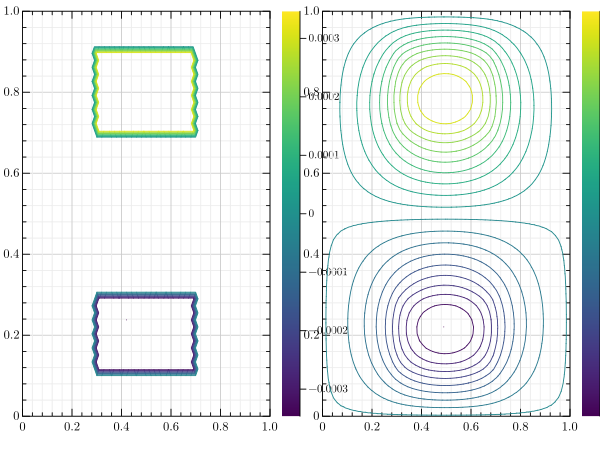

In [10]:
#..1/12: Finalize gmsh
gmsh.initialize()

#..2/12: Generate the mesh
gmsh.open("square.msh")

#..3/12 Get and sort the mesh nodes
#..Observe that although the mesh is two-dimensional,
#..the z-coordinate that is equal to zero is stored as well.
#..Observe that the coordinates are stored contiguously for computational
#..efficiency
node_ids, node_coord, _ = gmsh.model.mesh.getNodes()
nnodes = length(node_ids)
#..sort the node coordinates by ID, such that Node one sits at row 1
tosort = [node_ids node_coord[1:3:end] node_coord[2:3:end]];
sorted = sortslices(tosort , dims = 1);
node_ids = sorted[:,1]
xnode = sorted[:,2]
ynode = sorted[:,3]

#..4/12 Get the mesh elements
#..observe that we get all the two-dimensional triangular elements from the mesh
element_types, element_ids, element_connectivity = gmsh.model.mesh.getElements(2)
nelements = length(element_ids[1])

#..5/12 Define the source function and apply the source function to the local coordinates
#sourcefunction(x,y) = x+y
sourcefunction(x,y) = (x>0.3)*(x<0.7)*(y>0.7)*(y<0.9) - (x>0.3)*(x<0.7)*(y>0.1)*(y<0.3) 
fvalues = map(sourcefunction, xnode, ynode)

#..6/12 Initialize global matrix A and global vector f
#..observe that for simplicity we use dense matrix here
A = zeros(nnodes,nnodes)
M = zeros(nnodes,nnodes)
f = zeros(nnodes,1)

#..7/12 Perform a loop over the elements
for element_id in 1:nelements

  #....retrieve global numbering of the local nodes of the current element
  node1_id = element_connectivity[1][3*(element_id-1)+1]
  node2_id = element_connectivity[1][3*(element_id-1)+2]
  node3_id = element_connectivity[1][3*(element_id-1)+3]
  I = Vector{Int64}([node1_id; node2_id; node3_id])

  #....retrieve the x and y coordinates of the local nodes of the current element
  xnode1 = xnode[node1_id]; xnode2 = xnode[node2_id]; xnode3 = xnode[node3_id];
  ynode1 = ynode[node1_id]; ynode2 = ynode[node2_id]; ynode3 = ynode[node3_id];

  #....compute surface area of the current element
  area_id = area_triangle(xnode1,xnode2,xnode3,ynode1,ynode2,ynode3)

  #....if desired, print global number numbers and element area to screen
  if (false)
    println("on element ", element_id, " node-1 has global number ", node1_id)
    println("on element ", element_id, " node-2 has global number ", node2_id)
    println("on element ", element_id, " node-3 has global number ", node3_id)
    println("on element ", element_id, " area = ", area_id)
    println(" ")
  end

  #....compute local vector contribution floc of the current element
  floc = area_id/3*fvalues[I]

  #....compute local matrix contribution Aloc of the current element
  Emat = [[xnode1;xnode2;xnode3] [ynode1;ynode2;ynode3] [1;1;1]]\UniformScaling(1.);
  Emat[3,:] .= 0;
  Aloc = area_id*(transpose(Emat)*Emat);
  Mloc = area_id/3*[1 0 0; 0 1 0; 0 0 1]; 
    
  #....perform loop over nodes of the current element
  #....and add local contribution Aloc to global matrix entity A
  f[I] += floc  
  A[I,I] += Aloc
  M[I,I] += Mloc

end

#..8/12 Handle the boundary conditions
#..retrieve boundary nodes by loop over corner point and boundary edges
node_ids1=[]; node_ids2=[]; node_ids3=[]; node_ids4=[]; 
node_ids5=[]; node_ids6=[]; node_ids7=[]; node_ids8=[]; 
node_ids1, node_coord, _ = gmsh.model.mesh.getNodes(0,1)
node_ids2, node_coord, _ = gmsh.model.mesh.getNodes(0,2)
node_ids3, node_coord, _ = gmsh.model.mesh.getNodes(0,3)
node_ids4, node_coord, _ = gmsh.model.mesh.getNodes(0,4)
node_ids5, node_coord, _ = gmsh.model.mesh.getNodes(1,1)
node_ids6, node_coord, _ = gmsh.model.mesh.getNodes(1,2)
node_ids7, node_coord, _ = gmsh.model.mesh.getNodes(1,3)
node_ids8, node_coord, _ = gmsh.model.mesh.getNodes(1,4)
bnd_node_ids = union(node_ids1,node_ids2,node_ids3,node_ids4,node_ids5,node_ids6,node_ids7,node_ids8)
A[bnd_node_ids,:] .= 0;
A[bnd_node_ids,bnd_node_ids] = Diagonal(ones(size(bnd_node_ids)))
f[bnd_node_ids] .= 0;

#..9/12 Make A sparse and M diagonal 
A = sparse(A)
M = Diagonal(M)

#..9/12 Compute the numerical solution
u = A\f

#..10/12: Finalize gmsh
gmsh.finalize()

#..11/11 Plot the source term and the numerical solution
GR.subplot(1,2,1)
p1 = GR.tricont(xnode,ynode,f)
GR.subplot(1,2,2)
p1 = GR.tricont(xnode,ynode,u)

## Section 5:/ Solving the Scalar Diffusion Equation in Time Domain 

In [23]:
using DifferentialEquations

### Defining the Problem 

In [ ]:
#..define the right-hand side of the ordinary differential equation of the equation of motion 
function scalarDiffusionEquation!(du,u,p,t)
    du .= M \ (sin(2*π*50*t)*f - A*u)
end

#..set initial position and velocity
u0 = fill(1.,nnodes)
                                    
#..set time begin and end forward
t0 = 0.0
tf = 2.0
tspan = (t0,tf)

#..define ODE problem to be solved  
prob_scalarDiffusion = ODEProblem(scalarDiffusionEquation!, u0, tspan)

#..solve ODE problem 
sol = DifferentialEquations.solve(prob_scalarDiffusion);

### Plotting the computed solution 

In [ ]:
dt = 2
tvec = Vector(t0:dt:tf)

Plots.plot(sol)
for i in 2:nnodes-1
    Plots.plot!(sol,vars=i)
end
p1 = Plots.plot!(sol)
title!("Displacement")

#..plot solution of velocity and position as function of time  
Plots.plot(p1)

In [ ]:
anim = @animate for i in t0:tf
    Plots.surface(xnode,ynode,sol(i/10),st=:surface)
    zlims!(-.2, 1.5)
end
gif(anim, "my-animation.gif", fps = 1)

## Section 6:/ Solving a Modified Scalar Diffusion Equation in Time Domain 

In [ ]:
# set damping matrix
C = .005*M 

#..define the right-hand side of the ordinary differential equation of the equation of motion 
function scalarWaveEquation!(ddu,du,u,p,t)
    ddu .= M \ (f - A*u - C*du)
end

#..set initial position and velocity
u0 = fill(0.,nnodes)

v0 = zeros(nnodes)
# v0[4] = 1
                                    
#..set time begin and end forward
t0 = 0.0
tf = 20.0
tspan = (t0,tf)           

#..define ODE problem to be solved  
prob = SecondOrderODEProblem(scalarWaveEquation!,v0,u0,tspan)

#..solve ODE problem 
sol = DifferentialEquations.solve(prob);

### Post-plotting the Solution using time-traces  

In [ ]:
dt = 1
tvec = Vector(t0:dt:tf)

#..velocity and position have vars=(1:N) and vars=(N+1,2N), respectively. 
Plots.plot(sol,vars=1)
for i in 2:nnodes-1
    Plots.plot!(sol,vars=i)
end
p1 = Plots.plot!(sol,vars=nnodes)
title!("Velocity")

plot(sol,vars=nnodes+1)
for i in nnodes+2:2*nnodes-1
    Plots.plot!(sol,vars=i)
end
p2 = Plots.plot!(sol,vars=2*nnodes)
title!("Displacement")

#..plot solution of velocity and position as function of time  
Plots.plot(p1,p2,layout=(2,1))

### Post-plotting using animation 

In [ ]:
anim = @animate for i in t0:tf
    Plots.surface(xnode,ynode,sol(i/10)[nnodes+1:2*nnodes],st=:surface)
    zlims!(-.2, .4)
end
gif(anim, "my-animation.gif", fps = 15)

## Section 7:/ Further Improvements/Extensions to this Notebook 
1. avoid matrix $A$ to be dense. Instead, declare $A$ to be sparse (without pre-allocating memory for $A$). Traverse over elements, assemble I, J, Avals lists. After traversal, use sparse to construct the $A$ matrix (see 1D FEM code). Implement traversal using both for loop and map; 
2. put assembly inside function. Test function for type stability. Profile assemby of matrix and vector for various problem sizes. Check whether making Aloc to be a static matrix has any advantages. Check whether updating lists for I, J and Avals in place has any advanges;  
3. idem for solve. Replace backslash by iterative solution method (AMG as preconditioner for CG) and profile again;  
4. create seperate function to generate Aloc, Mloc and floc allowing to introduce quadrature on the element; 
5. create assembly on quadrilateral elements; 
6. create assembly for second order triangular (quadrilateral) elements; 
7. create assembly for non-homogeneous Neumann boundary conditions; 
8. create assembly for three-dimensional geometries; 